## Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1) # Traemos de Scikit learn el DataSet que utilizaremos

In [4]:
"""Las columnas son: 
- data es una matriz de 70000 filas y 784 columnas, donde cada fila representa una imagen de 28x28 píxeles (784 = 28*28) y cada columna representa un pixel.
- target es un vector de 70000 filas y 1 columna, donde cada fila representa la etiqueta de la imagen correspondiente en data.
- feature_names es una lista con los nombres de las columnas de data.
- DESCR es una descripción del dataset.
- details es información adicional sobre el dataset.
- ETC"""
mnist.keys() 


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"] # Separamos las columnas de data y target en dos variables diferentes
print(X.shape) # Imprimimos la forma de la matriz de datos, que debería ser (70000, 784)
print(y.shape) # Imprimimos la forma del vector de etiquetas, que debería ser (70000,)


(70000, 784)
(70000,)


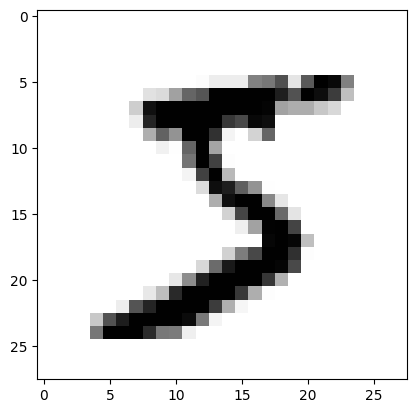

In [6]:
digit = X.to_numpy()[0] # Seleccionamos la primera imagen del dataset y la convertimos a un array de numpy
digit_image = digit.reshape(28, 28) # Redimensionamos el array a una matriz de 28x28 píxeles
plt.imshow(digit_image, cmap="binary") # Mostramos la imagen en escala de grises, cmap es el mapa de colores, le pasamos el digit_image para que lo muestre

In [7]:
y = y.astype(np.uint8) # Convertimos el vector de etiquetas a un array de enteros sin signo de 8 bits
y[0] # Para confirmar que es 5

5

In [8]:
X_train, X_test, y_train,  y_test = X[:60000], X[60000:], y[:60000], y[60000:] # Separamos el dataset en un conjunto de entrenamiento y otro de prueba, 60000 imágenes para entrenamiento y 10000 para prueba

In [9]:
y_train_5 = (y_train == 5) # Creamos un vector booleano que indica si cada imagen del conjunto de entrenamiento es un 5 o no
y_test_5 = (y_test == 5) # Creamos un vector booleano que indica si cada imagen del conjunto de prueba es un 5 o no

## SGBClassifier

In [10]:
from sklearn.linear_model import SGDClassifier # Importamos el clasificador SGDClassifier de Scikit-learn
sgd_clf = SGDClassifier(random_state=42) # Creamos una instancia del clasificador con una semilla aleatoria para reproducibilidad, el random_state es un número entero que se utiliza para inicializar el generador de números aleatorios, lo que permite obtener los mismos resultados cada vez que se ejecuta el código.

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([digit])

c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [12]:
### Medicion del Rendimiento
from sklearn.model_selection import cross_val_score # Importamos la función cross_val_score de Scikit-learn para realizar validación cruzada
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") # Realizamos validación cruzada con 3 pliegues y medimos la precisión del clasificador

array([0.95035, 0.96035, 0.9604 ])

In [13]:
### Matrix de Confusion
"""Explicacion:
TN: Verdaderos negativos, el clasificador predice que no es un 5 y realmente no es un 5.
FP: Falsos positivos, el clasificador predice que es un 5 pero realmente no lo es.
FN: Falsos negativos, el clasificador predice que no es un 5 pero realmente es un 5.
TP: Verdaderos positivos, el clasificador predice que es un 5 y realmente lo es."""
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3) # Realizamos predicciones con validación cruzada


from sklearn.metrics import confusion_matrix # Importamos la función confusion_matrix de Scikit-learn para crear la matriz de confusión
confusion_matrix(y_train_5, y_train_pred) # Creamos la matriz de confusión con los datos de entrenamiento y las predicciones

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Memoria y Precision
- Si la memoria aumenta, la precision baja
- Si la precision aumenta, la memoria baja

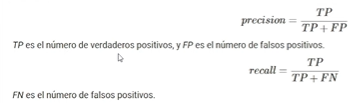

In [14]:
### Apartir de la Matrix de Confusion
from sklearn.metrics import precision_score, recall_score # Importamos las funciones precision_score y recall_score de Scikit-learn para calcular la precisión y el recall
print(precision_score(y_train_5, y_train_pred)) # Calculamos la precisión del clasificador
recall_score(y_train_5, y_train_pred) # Calculamos el recall del clasificador y 

0.8370879772350012


0.6511713705958311

#### F1
Es una combinacion entre recall y precision.
Es algo mas precisa

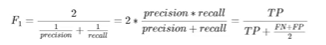

In [15]:
from sklearn.metrics import f1_score # Importamos la función f1_score de Scikit-learn para calcular la puntuación F1
f1_score(y_train_5, y_train_pred) # Calculamos la puntuación F1 del clasificador

0.7325171197343846